In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [10]:
X, y = make_regression(n_samples=1000, n_features=2, noise=25)
X = pd.DataFrame(data=X)
y = pd.DataFrame(data=y)

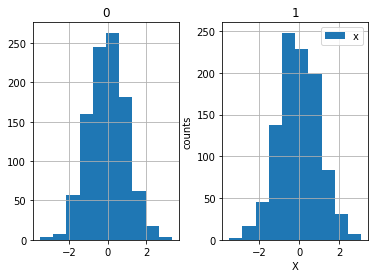

In [11]:
plt.figure(figsize=(4,3), dpi=150);
X.hist()
plt.xlabel('X')
plt.ylabel('counts')
plt.legend('x')

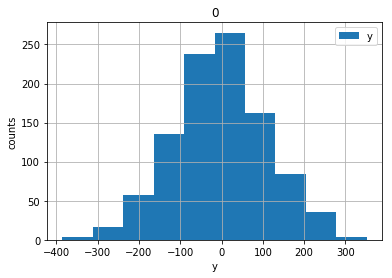

In [12]:
plt.figure(figsize=(4,3), dpi=150);
y.hist()
plt.xlabel('y');
plt.ylabel('counts');
plt.legend('y')

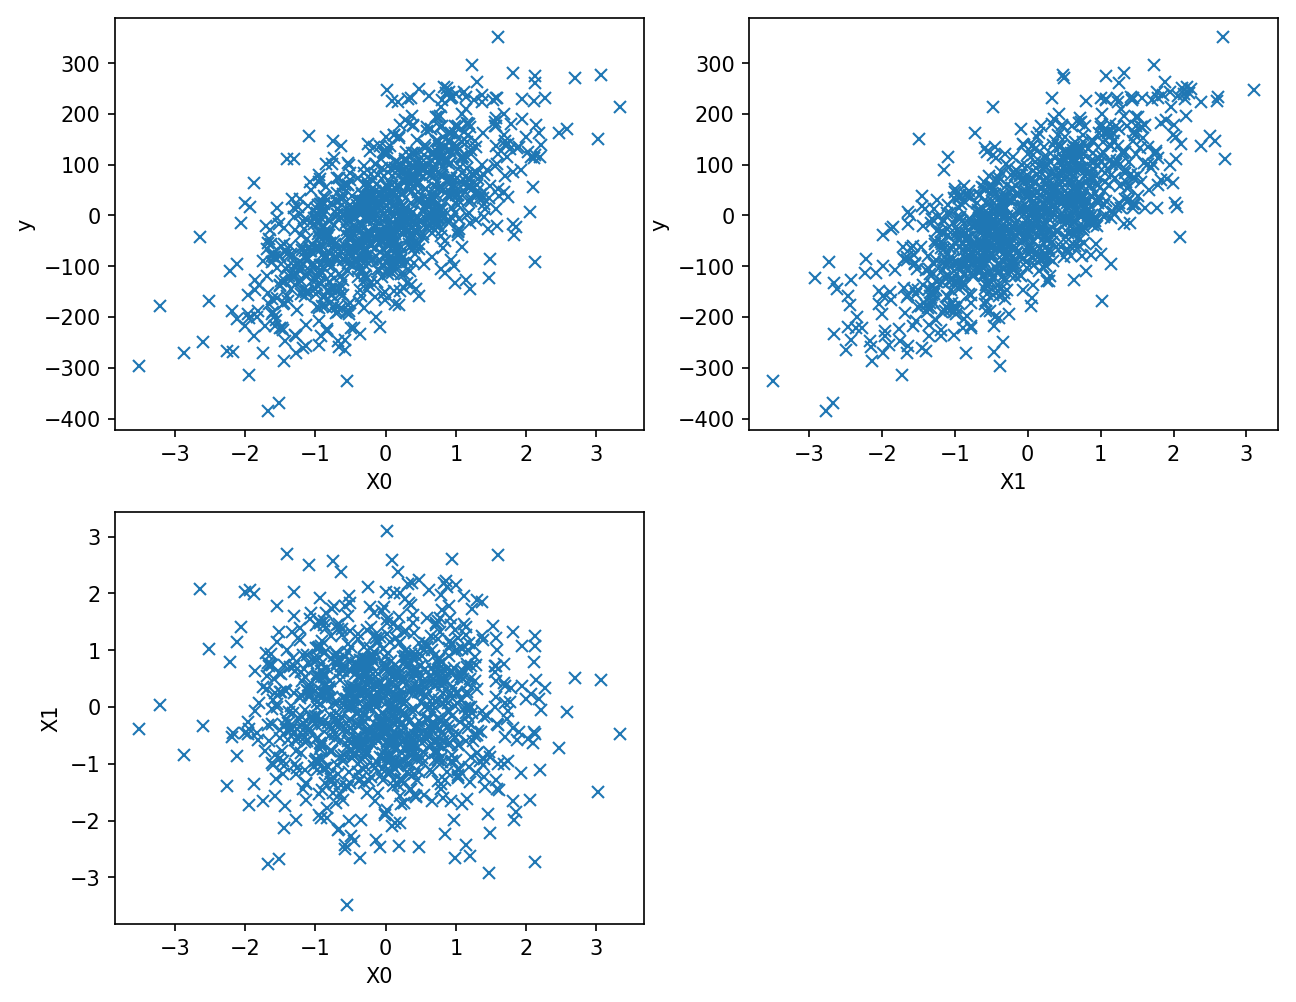

In [17]:
figure = plt.figure(figsize=(10,8), dpi=150);
ax = plt.subplot(2,2,1)
ax.plot(X[0],y,'x');
ax.set_xlabel('X0');
ax.set_ylabel('y');

ax = plt.subplot(2,2,2)
ax.plot(X[1],y,'x');
ax.set_xlabel('X1');
ax.set_ylabel('y');

ax = plt.subplot(2,2,3)
ax.plot(X[0],X[1],'x');
ax.set_xlabel('X0');
ax.set_ylabel('X1');

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
linearFit = LinearRegression()

X_train=X[:750]
y_train=y[:750]

X_test=X[750:]
y_test=y[750:]

linearFit.fit(X_train, y_train)
y_pred = linearFit.predict(X_test)

In [22]:
print("Coefficients: \n", linearFit.coef_)

Coefficients: 
 [[77.30340204 82.57867259]]


In [23]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 586.69


In [24]:
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.95


In [63]:
linearFit.coef_[0][0]

77.3034020444109

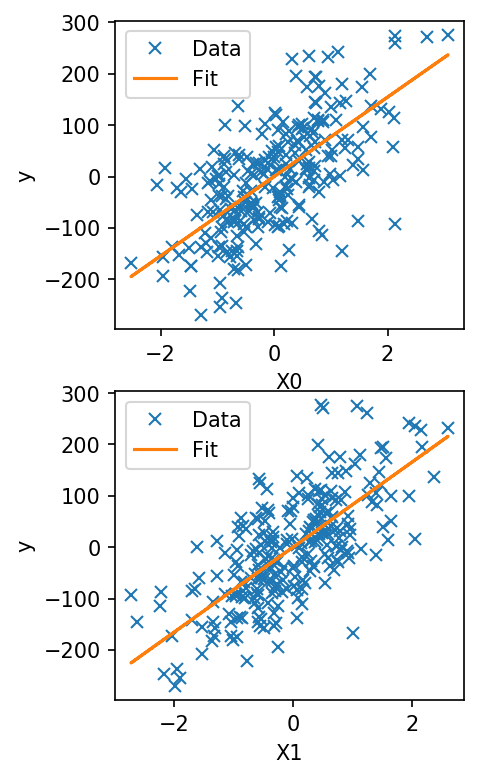

In [66]:
figure = plt.figure(figsize=(3,6), dpi=150);
ax = plt.subplot(2,1,1)
ax.plot(X_test[0],y_test,'x', X_test[0],linearFit.coef_[0][0]*X_test[0],'-');
ax.set_xlabel('X0');
ax.set_ylabel('y');
ax.legend(['Data','Fit']);

ax = plt.subplot(2,1,2)
ax.plot(X_test[1],y_test,'x', X_test[1],linearFit.coef_[0][1]*X_test[1],'-');
ax.set_xlabel('X1');
ax.set_ylabel('y');
ax.legend(['Data','Fit']);

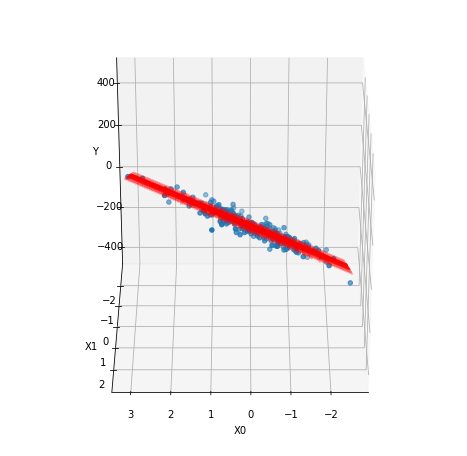

In [81]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[0],X_test[1],y_test)
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')

X0mesh, X1mesh = np.meshgrid(X_test[0],X_test[1])
Z = X0mesh*linearFit.coef_[0][0] + X1mesh*linearFit.coef_[0][1]

ax.plot_wireframe(X0mesh,X1mesh,Z, alpha=0.2, color='r')

ax.view_init(30,90)